# 6 Simple Regression

# 6.1 Insight and Mathematical Foundations

Regression model is used to describe the relationship between **independent** and **dependent** variables. When there is only on independent variable, the model is called a **simple regression model**. When there are more than one independent variables, the model is called a **multiple regression model**. When there are more than one dependent variables, the model is called **multivariate regression model**, but often times we will estimate separate models for each dependent variable instead of estimating them all at once.

First, formulate the regression using a simple linear form.

$$y=\beta_0+\beta_1 x+u$$

$\beta_0$ is called the **intercept**, $\beta_1$ is called the **slope** of the regression, and $u$ is the residual (aka unobservables), which is a catch-all term that captures all unexplained variations of y.

## Method - OLS

Now, we are concerned with estimating the **population parameters** $\beta_0$ and $\beta_1$ with the data we have. There are, indeed, numerous ways to estimate the parameters, but the most famous method is called **ordinary least squares**. Mathematically, it solves the following optimization problem.

$$\min_{\beta_0,\beta_1} \sum_i [y_i-(\beta_0+\beta_1 x)]^2$$

After solving the first order condition, there is an analytical solution ($\hat{\beta_0}, \hat{\beta_1}$) to this optimization problem.

$$\hat{\beta_0} = \bar{y}-\hat{\beta_1}\bar{x}$$
$$\hat{\beta_1} = \frac{Cov(x,y)}{Var(x)}$$


For a given sample, we just need to calculate the four statistics $\bar{y}, \bar{x}, Cov(x,y), \text{and }Var(x)$ and plug them into these equations. Let's give it a try!

## Implement your own simple OLS

- Task 1: define a function that takes two arguments x and y.
- Task 2: inside the function, you should calculate $\bar{y}, \bar{x}, Cov(x,y), \text{and }Var(x)$, and return two values called beta0 and beta1.
- Task 3: Import *CEOSAL1* from *wooldridge* and fit your model - $salary = \beta_0 +\beta_1roe+u$ - to the data. What are your estimates?

In [1]:
import numpy as np
def ols(x,y):
    cov = np.cov(x,y)[0,1]
    var = np.cov(x,y)[0,0]
    b1 = cov/var
    b0 = np.mean(y)- b1*np.mean(x)
    return b0, b1

In [2]:
import wooldridge as woo
df = woo.data("ceosal1")
df.head()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894


In [3]:
x = [1,2,3,4]
y = [2*i for i in x]

In [4]:
ols(x,y)

(0.0, 2.0)

# 6.2 Implementing using statsmodels

While calculating OLS coefficients using this pedestrian approach is straghtforward, there is a more convenient and powerful way to do it - a package called **statsmodels**

In [5]:
import statsmodels.formula.api as smf

The logic is a bit different from our own implementation, because it is expressed in an object-oriented way.

**Step 1**: Create an OLS regression *object*, with two required arguments - formula and data. See [this documentation](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html#statsmodels.formula.api.ols)

The *data* parameter takes a DataFrame as input. And the *formula* parameter specifies the structure of the model.

In [6]:
reg = smf.ols(formula = "salary ~ roe", data = df)

**Step 2**: To estimate parameters, use *reg.fit()* and assign the result to a variable.

In [7]:
result = reg.fit()

**Step 3**: To display the estimation table, use *result.summary()*. To display the estimators use *result.params*

In [8]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Mon, 04 Oct 2021   Prob (F-statistic):             0.0978
Time:                        14:34:41   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.0

> To save the table use as_csv(), as_text(), as_latex() function, with the Python io.

In [9]:
f = open("result.txt", "w")
f.write(result.summary().as_text())
f.close()

# or alternatively

with open("result.txt","w") as f:
    f.write(result.summary().as_text())

In [10]:
print(type(result))
result.params

<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>


Intercept    963.191336
roe           18.501186
dtype: float64

There are a lot more properties and methods of an result object. [Check here](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults).

## Advanced formula
The “-” sign can be used to remove columns/variables. For instance, we can remove the intercept from a model by:

In [11]:
smf.ols(formula='salary ~ roe - 1 ', data=df).fit().params

roe    63.537955
dtype: float64

More details about the formula parameter can be find [here](https://www.statsmodels.org/stable/example_formulas.html?highlight=formula)

# 6.3 Visulize the fitted model

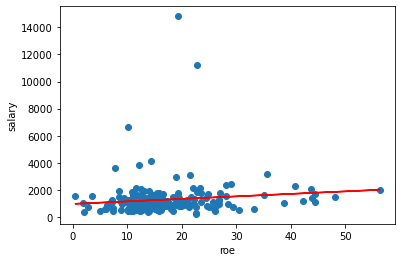

In [12]:
import matplotlib.pyplot as plt
yhat = result.fittedvalues

# stack plt functions to plot on the same figure
plt.scatter(x=df["roe"], y=df["salary"])
plt.plot(df["roe"], yhat, c = "r") # 
plt.xlabel("roe")
plt.ylabel("salary")
plt.show()

> In plt.plot(), x and y arguments cannot be passed as keyword arguments.

# 6.4 Interpret the Estimation Table - Top

In [13]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Mon, 04 Oct 2021   Prob (F-statistic):             0.0978
Time:                        14:34:41   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.0

### Degrees of freedom for residuals and model
In statistics, the degrees of freedom of a vector is the number of independent component (dimension of a vector space). In laymen terms, this means the maximal number of values that can vary freely and simultaneously without violating any constraints.

For instance, consider the constant term in the simple regression model. It is defined as a constant, so in the entire column of $constant_i$, there is only one value that can change freely (all the rest values must change "accordingly"). So, Df constant = 1.

For Df Residuals, the degrees of freedom is **n-(k+1)** when there is a constant. Because there are two F.O.C restricting the residuals. More formally, you need to prove that SSE satisfies a $\chi^2(n-k-1)$ distribution.

Degrees of freedom of the model is the degree of freedom for SSR, this is equal to **k** - number of independent variables. Informally, this is because $\hat{y} = \beta_0+\beta_1 x_1 + ... + \beta_k x_k$, so given the estimated parameters, only the k regressors can vary independently.

### R-squared

Sum of squares total: $SST = \sum_{i=1}^n(y_i-\bar{y})^2$ \
Sum of squares regression: $SSR = \sum_{i=1}^n(\hat{y} - \bar{y})^2$ \
Sum of squares error: $SSE = \sum_{i=1}^n(y_i-\hat{y})^2$ 

For regression models with a **constant**, we have
$$SST = SSR + SSE$$
Or in other words: **Total variability = Explained variability + Unexplained variability**.

Therefore, it is rational to use $R^2 = \frac{SSR}{SST}$, which is in the range of [0,1] as a ratio measure for the model's **goodness of fit**. A larger **R-squared** means a larger portion of variability is explained by the regression model, and therefore a better fit.

# 6.5 The middle of the estimation table - Coefficients and Significance Tests

### Coef.

We have already illustrated how to mathematically calculate the estimators - coefficients. But we haven't talked about the randomness (uncertainty) of $\hat{\beta_0}$ and $\hat{\beta_1}$.

Given x, y is still a random variable due to the unobserved error term. Since both estimators are functions of x and y. Even after conditioning on x, $\hat{\beta_0}$ and $\hat{\beta_1}$ are still subject to uncertainty from u. In other words, if u takes a different value, $\hat{\beta_0}$ and $\hat{\beta_1}$ will be different.

Hence, $\hat{\beta_0}$ and $\hat{\beta_1}$ are random variables and can be proved to follow a Normal distribution when the number of observations n is large, and follow a t(n-k-1) distribution when n is small (rule of thumb 30).

To see this, let's consider an example where the value y is determined by two variables x and u (**dgp** - data generating process). Variable x is observable, but u is unobservable, therefore even after controlling for x, y still varies.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

b0_ls = []
b1_ls = []
for i in range(100):
    x = np.array([1,2,3,4,5,6])
    u = np.random.randn(len(x))
    y = 1 + x + u
 
    b0, b1 = ols(x,y)
    b0_ls.append(b0)
    b1_ls.append(b1)

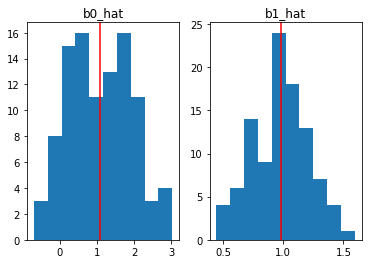

In [24]:
fig, ax = plt.subplots(1,2)
ax[0].hist(x=b0_ls)
ax[0].set_title("b0_hat")
ax[0].axvline(np.mean(b0_ls),c="r")
ax[1].hist(x=b1_ls)
ax[1].set_title("b1_hat")
ax[1].axvline(np.mean(b1_ls),c="r")
plt.show()

> This process of generating an empirical distribution with simulations is called **Monte-Carlo Simulation**

### Exercise

1. $\chi^2(dof)$ distribution is defined as the summation of *dof* number of squared normal distributions. As an example, assume $Z\sim N(0,1)$, and $X = Z^2$. Try to simulate the distribution of X, this will give you an approximation of the distribution of X.

2. Next, pack the above codes as a function - named *chi2sim*, takes one argument *dof*, and displays the simulated $\chi^2(dof)$ distribution.

### Standard Error of an Estimator

Standard Error is the standard deviation of an estimator - $\hat{\beta}$. We can get an analytical standard error based on the functional form of the estimator and central limit theorem. Or alternatively, we can compute the standard error using computation approach such as the bootstrap method.

For the simple OLS estimator
$$se(\hat{\beta_0})=s\sqrt{\frac{1}{n}+\frac{\bar{x}^2}{\sum(x_i-\bar{x})^2}}$$

$$se(\hat{\beta_1})=\frac{s}{\sqrt{\sum(x_i-\bar{x})^2}}$$

where s is the sample standard deviation of the error term $\hat{u}$.

### t-statistic
This is the t statistics calculated using the following formula.

$$ t = \frac{\hat{\beta}}{se(\hat{\beta})}$$

### p-value
This is $P(t > |t_{statistic}|)$ in a $t(n-k-1)$ distribution. The smaller the value (compare with 0.01, 0.05, 0.1), the more confident we can claim that parameter $\beta$ is not equal to 0.

### Confidence Interval 
Confidence interval is the probability bounds for an estimator. Bounds are numbers such that $P(\text{lower bound}<\beta<\text{upper bound}) = \text{confidence level}$.

More specifically for OLS estimators

$$\text{lower bound} = \hat{\beta} - t_{\alpha/2} se(\hat{\beta})$$
and
$$\text{upper bound} = \hat{\beta} + t_{\alpha/2} se(\hat{\beta})$$

where $1-\alpha$ is the confidence level. And there is a $1-\alpha$ probability that the population parameter $\beta$ is within this interval

# 6.6 Interpret the bottom of the estimation table - Diagnostic Test

To guarantee the estimators have good statistical properties - unbiased, consistent, efficient. We will need to make four assumptions before running OLS.
1. Correct specification of E[Y|x]. i.e. $E[Y|x] = \beta_0+\beta_1*x$ is the true model that generates the data. This is equivalent to $E[U|x] = 0$, and implies $Cov(X,U)=0$

> Ensures unbiasness and consistency.

2. Errors are normally distributed across the data. Mathematically, this means $U|x \sim N(0,\sigma_x^2)$

> Ensures efficiency

3. $u_i$ are independently and identically distributed (i.i.d). This implies two properties
    1. Homoscedasticity. This means that the variance of the errors is consistent across values of X. We want to avoid situations where the error rate grows in a particular direction. 
    2. No serial correlation. $u_i$s are independent with each other. 

> Ensures efficiency

4. The independent variables are not collinear (for multiple regression only)

> Ensures the identifiability

> These four assumptions are known as Gauss Markov Assumptions.

### Omnibus (Diagnose assumption 2)
In statistics, an omnibus test is any statistical test that tests for the significance of several parameters in a model at once. F-test is one omnibus test. But in the estimation table, the omnibus test stands for the D’Agostino Omnibus test for normality. D’Agostino(1990) describes a normality test that combines the tests for skewness and kurtosis. This statistic satisfies a $\chi^2(2)$ distribution. $H_0: Skew(u)=0\text{ and }Kurtosis(u)=3$

### Durbin-Watson (Diagnose assumption 3.B)

A test for serial correlation. We hope to have a value between 1.5 to 2.5 (rule of thumb). 

$$DW = \frac{\sum (\hat{u_i} - \hat{u_{i-1}})^2}{\sum \hat{u_i}^2}$$

The value always lies between 0 and 4, and DW=2 indicates no lag-1 serial correlation (autocorrelation).

### Jarque-Bera (JB)/Prob(JB) (Diagnose assumption 2)

The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. JB statistic = $\frac{n}{6}(S^2+\frac{1}{4}(K-3)^2)$, and it satisfies a $\chi^2(2)$ distribution. $H_0: Skew(u)=0\text{ and }Kurtosis(u)=3$

# Exercise

Use the data set *WAGE1* and study the relationship between education and wage.